**Connect with Google Drive**

```
`# This is formatted as code`
```



Note: open the link the following cell will generate, then allow this app and copy the code. Come back to this tab and paste the authorization code.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
root_dir = "/content/gdrive/My Drive/"

In [5]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O "/content/gdrive/My Drive/colab/data/cats_and_dogs_filtered.zip"

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import glob
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [7]:
# import os
# import zipfile

# local_zip =root_dir+'/colab/data/cats_dogs/train.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall(root_dir+'/colab/data/cats_dogs/')
# zip_ref.close()

**Change the location to where you put the "train" folder**

In [8]:
#for my case the following location.
cats_dogs=root_dir+'/colab/data/cats_dogs/train'

**Load the data files from google drive. This will take some time**

In [14]:
files = glob.glob(cats_dogs+'/*') 
print('total files=', len(files))

total files= 25000


**You should see: total files= 25000** <br>
**In case, if your output is "total files= 0" then rerun the cell above.**

In [15]:
cat_files = [fn for fn in files if 'cat.' in fn]
dog_files = [fn for fn in files if 'dog.' in fn]
print('cat files:', len(cat_files), 'dog files:',len(dog_files))

cat files: 12500 dog files: 12500


You should see "cat files: 12500 dog files: 12500"

**For this task, we will use 1000 cat images and 1000 dog images.**

In [16]:
n=1000
cat_files=np.array(cat_files[:n])
dog_files=np.array(dog_files[:n])

In [17]:
print('cat files:', len(cat_files), 'dog files:',len(dog_files))

cat files: 1000 dog files: 1000


Split data into train, validation and test <br>
You should see "Train, Validation, Test:  (1200,) (400,) (400,)"

In [18]:
train_size=600
val_size=200
test_size=200
cat_indices=np.random.permutation(n)
dog_indices=np.random.permutation(n) 
train_files=np.concatenate([cat_files[cat_indices[0:train_size]], dog_files[dog_indices[0:train_size]]]) 
val_files=np.concatenate([cat_files[cat_indices[train_size:train_size+val_size]], dog_files[dog_indices[train_size:train_size+val_size]]]) 
test_files=np.concatenate([cat_files[cat_indices[-test_size:]], dog_files[dog_indices[-test_size:]]]) 

print('Train, Validation, Test: ',train_files.shape, val_files.shape, test_files.shape)

Train, Validation, Test:  (1200,) (400,) (400,)


**Loading the images: the following cell might take some time to run.**

You should see ""

In [21]:
IMG_DIM = (150, 150)
train_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] )/255.0
print('train_imgs_shape:',train_imgs.shape)

train_imgs_shape: (1200, 150, 150, 3)


In [22]:
val_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in val_files] )/255.0
print('validation_imgs_shape:',val_imgs.shape)

validation_imgs_shape: (400, 150, 150, 3)


In [23]:
test_imgs =np.array( [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files] )/255.0
print('test_imgs_shape:',test_imgs.shape)

test_imgs_shape: (400, 150, 150, 3)


In [24]:
print(f'shapes: {train_imgs.shape}  {val_imgs.shape}  {test_imgs.shape}')

shapes: (1200, 150, 150, 3)  (400, 150, 150, 3)  (400, 150, 150, 3)


In [26]:
print(train_files[0])
train_files[0].split('/')[-1]

/content/gdrive/My Drive//colab/data/cats_dogs/train/cat.9856.jpg


'cat.9856.jpg'

In [27]:
train_labels=[ file.split('/')[-1].split('.')[0] for file in train_files]
val_labels=[ file.split('/')[-1].split('.')[0] for file in val_files]
test_labels=[ file.split('/')[-1].split('.')[0] for file in test_files]

print( train_labels[595:605])
print(val_labels[195:205])
print(test_labels[195:205])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']
['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog']


In [28]:
#name to number
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(val_labels)
test_labels_enc = le.transform(test_labels)

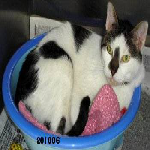

In [29]:
array_to_img(train_imgs[1])

In [30]:
input_shape = (150, 150, 3)
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',   input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [31]:
# #model without dropout.
# input_shape = (150, 150, 3)
# model = Sequential()

# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',   input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(),
#               metrics=['accuracy'])

# model.summary()

In [32]:
history = model.fit(x=train_imgs, y=train_labels_enc,
                    validation_data=(val_imgs, validation_labels_enc),
                    batch_size=32,
                    epochs=20,
                    verbose=1)

Epoch 1/20
38/38 [==============================] - 39s 1s/step - loss: 1.2553 - accuracy: 0.5217 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/20
38/38 [==============================] - 39s 1s/step - loss: 0.6939 - accuracy: 0.5183 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/20
38/38 [==============================] - 39s 1s/step - loss: 0.6943 - accuracy: 0.5100 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/20
38/38 [==============================] - 39s 1s/step - loss: 0.7010 - accuracy: 0.5367 - val_loss: 0.6964 - val_accuracy: 0.5050
Epoch 5/20
38/38 [==============================] - 39s 1s/step - loss: 0.6942 - accuracy: 0.5300 - val_loss: 0.6878 - val_accuracy: 0.5900
Epoch 6/20
38/38 [==============================] - 39s 1s/step - loss: 0.7076 - accuracy: 0.5592 - val_loss: 0.6868 - val_accuracy: 0.5800
Epoch 7/20
38/38 [==============================] - 39s 1s/step - loss: 0.6787 - accuracy: 0.6058 - val_loss: 0.7185 - val_accuracy: 0.5350
Epoch 8/20
38/38 [==

In [33]:
loss, acc=model.evaluate(test_imgs, test_labels_enc)
print(f'test accuracy {acc}')

13/13 [==============================] - 3s 222ms/step - loss: 0.7832 - accuracy: 0.6775
test accuracy 0.6775000095367432


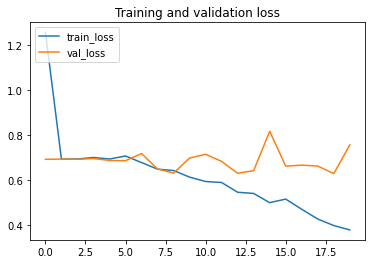

In [34]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

**Loading VGG**

In [35]:
input_shape = (150, 150, 3)
vgg = VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

58892288/58889256 [==============================] - 1s 0us/step


In [36]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

(1, 4, 4, 512)


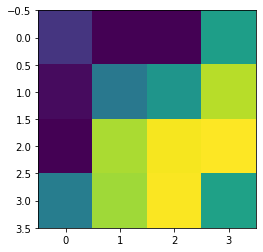

In [37]:
bottleneck_feature_example = vgg.predict(train_imgs[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

**Extract features using pretrained vgg model**

In [38]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [39]:
train_features_vgg = get_bottleneck_features(vgg, train_imgs)
validation_features_vgg = get_bottleneck_features(vgg, val_imgs)
test_features_vgg = get_bottleneck_features(vgg, test_imgs)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape,
     '\nTest Bottleneck Features:', test_features_vgg.shape)

Train Bottleneck Features: (1200, 4, 4, 512) 	Validation Bottleneck Features: (400, 4, 4, 512) 
Test Bottleneck Features: (400, 4, 4, 512)


In [40]:
vgg_features_train=train_features_vgg.reshape(train_features_vgg.shape[0], -1)
vgg_features_val=validation_features_vgg.reshape(validation_features_vgg.shape[0], -1)
vgg_features_test=test_features_vgg.reshape(test_features_vgg.shape[0],-1)

In [41]:
vgg_features_train.shape

(1200, 8192)

In [42]:
input_shape = vgg_features_train.shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',  optimizer=optimizers.RMSprop(lr=1e-4),  metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x=vgg_features_train, y=train_labels_enc,
                    validation_data=(vgg_features_val, validation_labels_enc),
                    batch_size=32,
                    epochs=20,
                    verbose=1)

Epoch 1/20
38/38 [==============================] - 2s 54ms/step - loss: 0.5317 - accuracy: 0.7275 - val_loss: 0.5218 - val_accuracy: 0.7275
Epoch 2/20
38/38 [==============================] - 2s 51ms/step - loss: 0.3407 - accuracy: 0.8475 - val_loss: 0.3065 - val_accuracy: 0.8725
Epoch 3/20
38/38 [==============================] - 2s 51ms/step - loss: 0.2895 - accuracy: 0.8700 - val_loss: 0.2839 - val_accuracy: 0.8900
Epoch 4/20
38/38 [==============================] - 2s 51ms/step - loss: 0.2347 - accuracy: 0.9008 - val_loss: 0.2740 - val_accuracy: 0.8950
Epoch 5/20
38/38 [==============================] - 2s 51ms/step - loss: 0.1837 - accuracy: 0.9275 - val_loss: 0.3545 - val_accuracy: 0.8525
Epoch 6/20
38/38 [==============================] - 2s 51ms/step - loss: 0.1530 - accuracy: 0.9483 - val_loss: 0.2730 - val_accuracy: 0.8950
Epoch 7/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1342 - accuracy: 0.9508 - val_loss: 0.3543 - val_accuracy: 0.8600
Epoch 8/20
38

In [44]:
loss, acc=model.evaluate(vgg_features_test, test_labels_enc)
print(f'test accuracy {acc}')

13/13 [==============================] - 0s 10ms/step - loss: 0.2702 - accuracy: 0.9200
test accuracy 0.9200000166893005


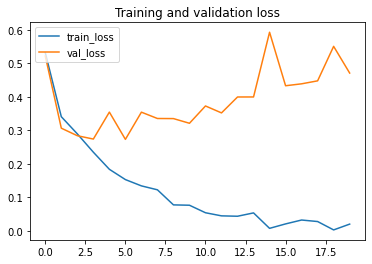

In [45]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

In [46]:
input_shape

8192

**Inception Model**

In [47]:
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical 
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D                            

In [48]:
train_labels_c=to_categorical(train_labels_enc)
validation_labels_c=to_categorical(validation_labels_enc)
test_labels_c=to_categorical(test_labels_enc)

In [49]:
input_shape = (150, 150, 3)
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=input_shape)

87916544/87910968 [==============================] - 1s 0us/step


In [52]:
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = 2
predictions = Dense(total_classes, activation='softmax')(out)

model = Model(inputs=base_inception.input, outputs=predictions)

#freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 
# model.summary()

In [53]:
history = model.fit(x=train_imgs, y=train_labels_c,
                    validation_data=(val_imgs, validation_labels_c),
                    batch_size=32,
                    epochs=6,
                    verbose=1)

Epoch 1/6
38/38 [==============================] - 59s 2s/step - loss: 0.2264 - accuracy: 0.8992 - val_loss: 0.0980 - val_accuracy: 0.9525
Epoch 2/6
38/38 [==============================] - 58s 2s/step - loss: 0.0525 - accuracy: 0.9792 - val_loss: 0.0861 - val_accuracy: 0.9600
Epoch 3/6
38/38 [==============================] - 58s 2s/step - loss: 0.0250 - accuracy: 0.9967 - val_loss: 0.0811 - val_accuracy: 0.9700
Epoch 4/6
38/38 [==============================] - 58s 2s/step - loss: 0.0162 - accuracy: 0.9992 - val_loss: 0.0850 - val_accuracy: 0.9600
Epoch 5/6
38/38 [==============================] - 58s 2s/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9625
Epoch 6/6
38/38 [==============================] - 61s 2s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9675


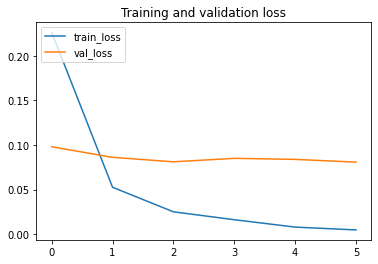

In [54]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Training and validation loss')
plt.legend(loc="upper left")
plt.show()

In [55]:
loss, acc=model.evaluate(test_imgs, test_labels_c)
print(f'test accuracy {acc}')

13/13 [==============================] - 14s 1s/step - loss: 0.0917 - accuracy: 0.9625
test accuracy 0.9624999761581421


**Clean Up**

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
#Helpful Tutorial: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a